In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy.special import boxcox1p
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import csv
import os
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
os.getcwd()


'/home/jovyan/Kaggle/mid_test/PM25'

In [2]:
PATH = '/home/jovyan/Kaggle/mid_test/PM25/'
train = pd.read_csv(PATH+ 'PM25_train.csv',  engine='c')
test = pd.read_csv(PATH + 'PM25_test.csv', engine='c')

In [3]:
train.head()

,device_id,Date,Time,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
1,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
2,28C2DDDD415C,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
3,28C2DDDD415C,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755
4,28C2DDDD415C,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755


In [4]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116554 entries, 0 to 1116553
Columns: 10 entries, device_id to lon
dtypes: float64(7), object(3)
memory usage: 85.2+ MB


In [5]:
test.head() #test data no sale price

,device_id,Date,Time,PM10,PM1,Temperature,Humidity,lat,lon
0,28C2DDDD415C,2017-01-31,00:04:05,0.000,0.000,18.620,92.000,23.741,120.755
1,28C2DDDD415C,2017-01-31,00:10:01,0.000,0.000,18.750,92.000,23.741,120.755
2,28C2DDDD415C,2017-01-31,00:15:57,0.000,0.000,18.620,92.000,23.741,120.755
3,28C2DDDD415C,2017-01-31,00:21:53,0.000,0.000,18.620,92.000,23.741,120.755
4,28C2DDDD415C,2017-01-31,00:27:48,0.000,0.000,18.620,92.000,23.741,120.755


In [6]:
# train = train.transpose()
# test = test.transpose()

In [7]:
#train['device_id']=train.groupby['device_id']

# all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))

In [8]:
# counts = train['device_id'].value_counts()
# #train[train['device_id'].isin(counts.index[counts > 1])]

# Need to know the distribution of PM2.5

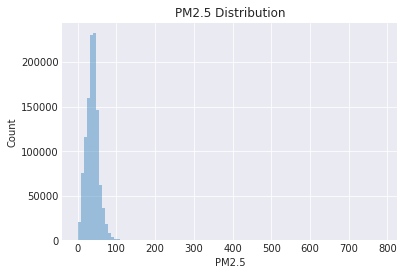

In [9]:
sns.distplot(train['PM2.5'], bins=100, kde=False)
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5')
plt.ylabel('Count')
plt.show()

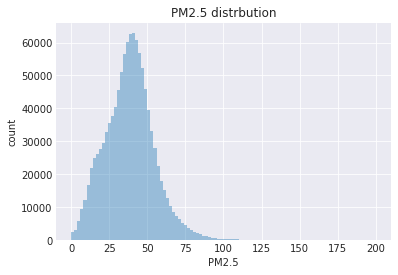

In [10]:
sns.distplot(train[train['PM2.5']<=200]['PM2.5'],bins=100,kde=False)
plt.title('PM2.5 distrbution')
plt.xlabel('PM2.5')
plt.ylabel('count')
plt.show()

In [11]:
# train = train.drop(train[(train['PM2.5']<5)].index)
# sns.distplot(train['PM2.5'], bins=100, kde=False)
# plt.title('Price Distribution')
# plt.xlabel('PM2.5')
# plt.ylabel('Count')
# plt.show()

### from above we could see if outlier, would be found or not

#### Use Log and boxcox1p transformation to check which transformation is better then reduce the distance between outlier and mode

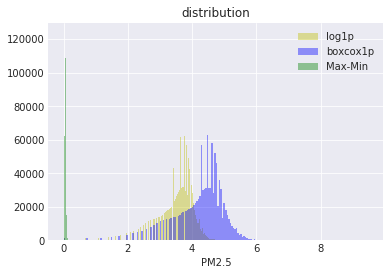

In [12]:
sns.distplot(np.log1p(train['PM2.5']), bins=200, kde=False,color='y',label='log1p')
sns.distplot(boxcox1p(train['PM2.5'],0.1), bins=200, kde=False, color='b', label='boxcox1p')
upper = train['PM2.5'].max(axis=0)
lower = train['PM2.5'].min(axis=0)
train_PM25 = np.asarray((train['PM2.5'])/(upper-lower))

sns.distplot(train_PM25,bins=200, kde=False,color='g',label='Max-Min')

# sns.distplot((np.max(train['PM2.5'])-np.min(train['PM2.5']))/(np.max(train['PM2.5'])+np.min(train['PM2.5'])),bins=200, kde=False,color='g',label='Max-Min')
# sns.distplot((np.max(train['PM2,bins=200, kde=False,color='g',label='Max-Min')
plt.title('distribution')
plt.xlabel('PM2.5')
plt.legend(['log1p', 'boxcox1p','Max-Min'])
plt.show()


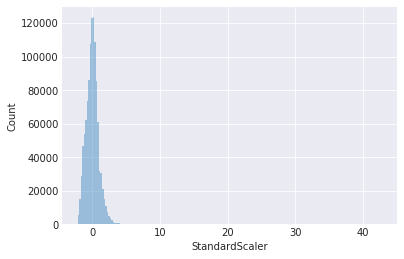

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
s_PM25 = scaler.fit_transform(train['PM2.5'].values.reshape(-1, 1))
sns.distplot(s_PM25, bins=200, kde=False)
plt.xlabel('StandardScaler')
plt.ylabel('Count')
plt.show()
del s_PM25

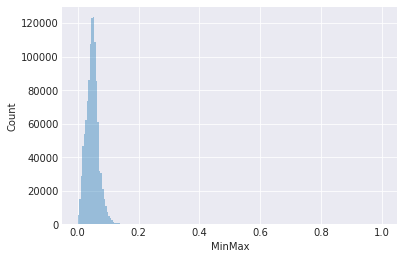

In [14]:
minmax = MinMaxScaler()
mm_pm25 = minmax.fit_transform(train['PM2.5'].values.reshape(-1, 1))
sns.distplot(mm_pm25, bins=200, kde=False)
plt.xlabel('MinMax')
plt.ylabel('Count')
plt.show()
del mm_pm25

In [ ]:
# for i in range(3,8):
#     plt.subplot(3,2,i+1)
#     plt.scatter(train.iloc[:,i],train['PM2.5'])
#     plt.title("chart:{}".format(train.iloc[i]).index)
# plt.show()

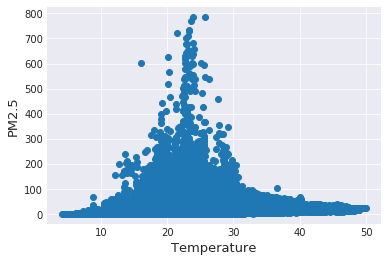

In [85]:
fig, ax = plt.subplots()
ax.scatter(x = train['Temperature'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('Temperature', fontsize=13)
plt.show()



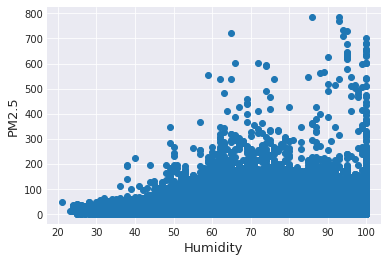

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = train['Humidity'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('Humidity', fontsize=13)
plt.show()

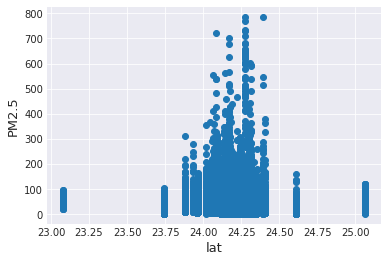

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = train['lat'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('lat', fontsize=13)
plt.show()

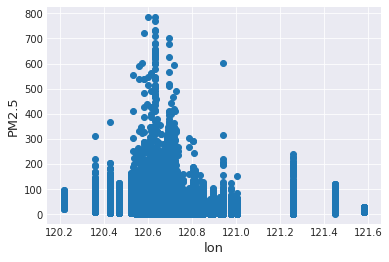

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = train['lon'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('lon', fontsize=13)
plt.show()

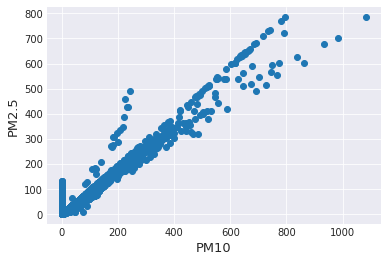

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = train['PM10'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('PM10', fontsize=13)
plt.show()

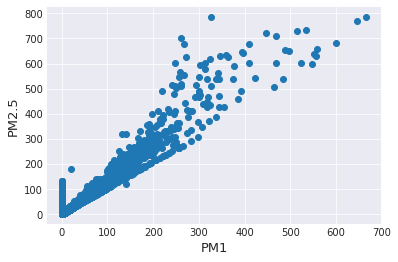

In [37]:
fig, ax = plt.subplots()
ax.scatter(x = train['PM1'], y = train['PM2.5'])
plt.ylabel('PM2.5', fontsize=13)
plt.xlabel('PM1', fontsize=13)
plt.show()

In [38]:
# #Deleting outliers
# train = train.drop(train[(train['Temperature']>50) & (train['PM2.5']>200)].index)

# #Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(train['Temperature'], train['PM2.5'])
# plt.ylabel('PM2.5', fontsize=13)
# plt.xlabel('Temperature', fontsize=13)
# plt.show()


 mu = 38.19 and sigma = 17.47



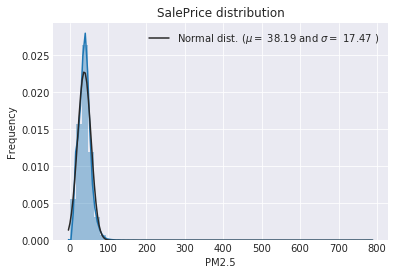

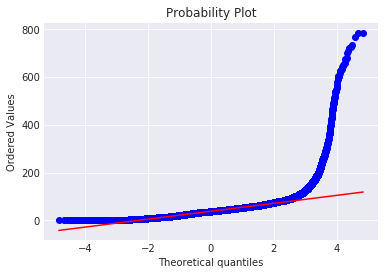

In [39]:
sns.distplot(train['PM2.5'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['PM2.5'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['PM2.5'], plot=plt)
plt.show()

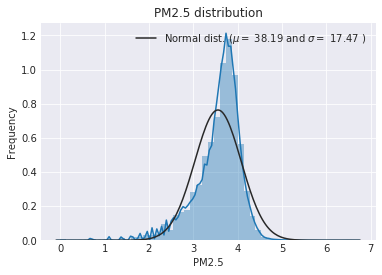

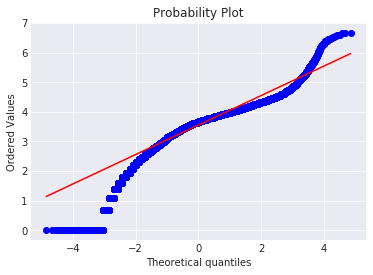

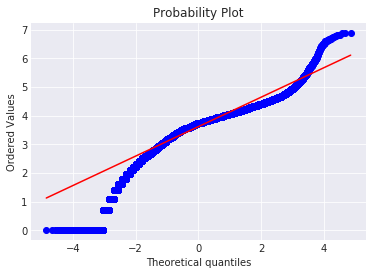

In [40]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#train["PM2.5"] = np.log1p(train["PM2.5"])

#Check the new distribution 
sns.distplot(np.log1p(train['PM2.5']) , fit=norm);

# Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(np.log1p(train['PM2.5'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PM2.5 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(train['PM2.5']), plot=plt)
plt.show()

fig = plt.figure()
res = stats.probplot(boxcox1p(train['PM2.5'],0.01), plot=plt)
plt.show()

# No need Id, so we need to drop Id

In [41]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['device_id']
test_ID = test['device_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['device_id'], axis = 1, inplace = True)
test.drop(['device_id'], axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1116554, 10) 
The test data size before dropping Id feature is : (41223, 9) 

The train data size after dropping Id feature is : (1116554, 9) 
The test data size after dropping Id feature is : (41223, 8) 


In [42]:
train.head()

,Date,Time,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
1,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
2,2017-01-01,08:03:09,21.000,0.000,0.000,24.120,83.000,23.741,120.755
3,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755
4,2017-01-01,08:09:04,20.000,0.000,0.000,24.120,82.000,23.741,120.755


In [43]:
test.head()

,Date,Time,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-01-31,00:04:05,0.000,0.000,18.620,92.000,23.741,120.755
1,2017-01-31,00:10:01,0.000,0.000,18.750,92.000,23.741,120.755
2,2017-01-31,00:15:57,0.000,0.000,18.620,92.000,23.741,120.755
3,2017-01-31,00:21:53,0.000,0.000,18.620,92.000,23.741,120.755
4,2017-01-31,00:27:48,0.000,0.000,18.620,92.000,23.741,120.755


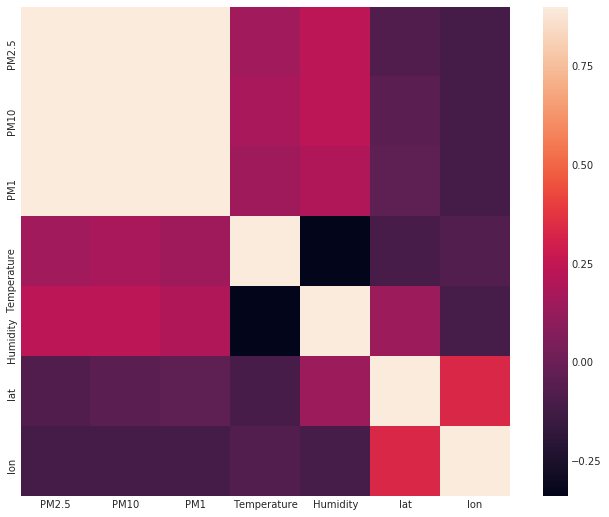

In [44]:
#Correlation map to see how features are correlated with PM25
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [45]:
from sklearn.model_selection import KFold

categorical_features = []

for dtype, feature in zip(train.dtypes, train.columns):
    if dtype == object:
        categorical_features.append(feature)

categorical_features

['Date', 'Time']

         Date      Time   PM25  PM10   PM1  Temperature  Humidity    lat  \
0  2017-01-01  08:03:09 21.000 0.000 0.000       24.120    83.000 23.741   
1  2017-01-01  08:03:09 21.000 0.000 0.000       24.120    83.000 23.741   
2  2017-01-01  08:03:09 21.000 0.000 0.000       24.120    83.000 23.741   
3  2017-01-01  08:09:04 20.000 0.000 0.000       24.120    82.000 23.741   
4  2017-01-01  08:09:04 20.000 0.000 0.000       24.120    82.000 23.741   

      lon  
0 120.755  
1 120.755  
2 120.755  
3 120.755  
4 120.755  


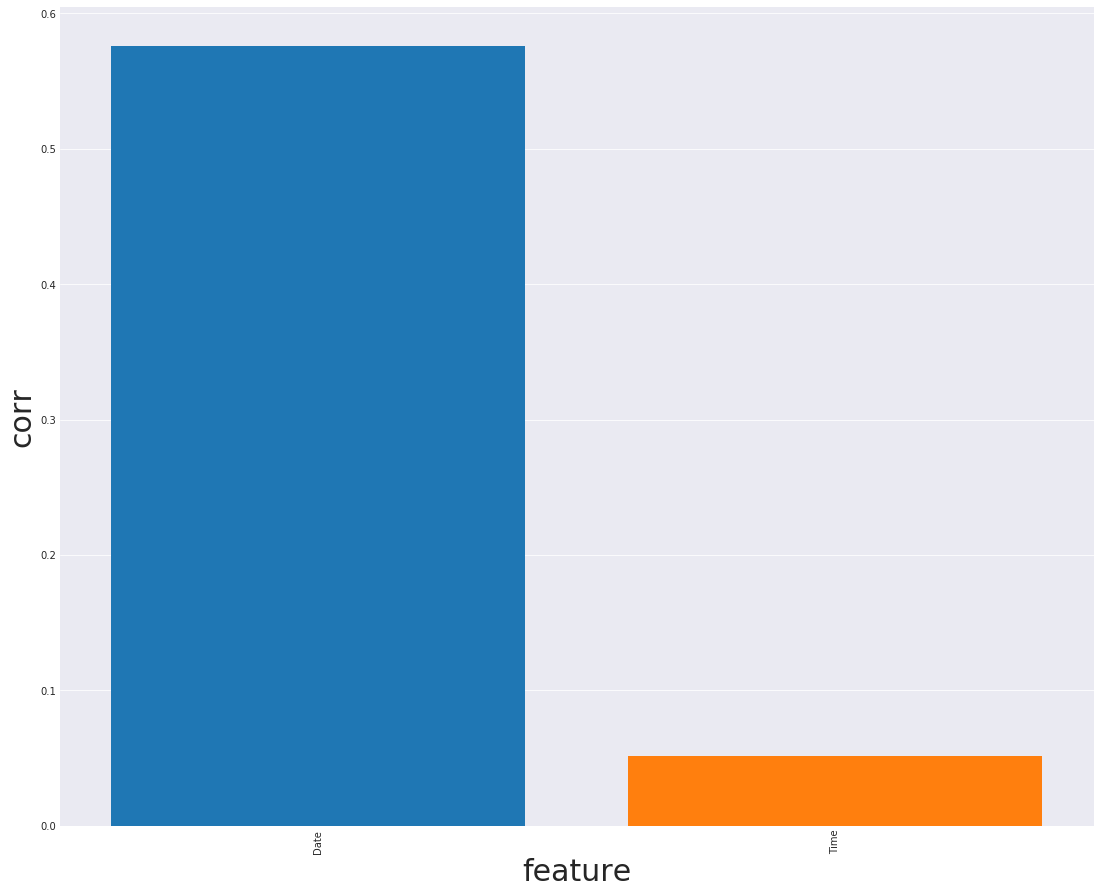

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = False)
train1 = train
test1 = test
#train1 = pd.read_csv(PATH+ 'PM25_train.csv',  engine='c')
train1= train1.rename(columns={train1.columns[2]:'PM25'})
print(train1.head(5))
global_mean = train1['PM25'].mean()

# #df.rename(columns={ df.columns[1]: "your value" })
# ###########################################################
feature_list =[]
corr_list =[]
for f_ in categorical_features:    
    
    train1['item_target_enc'] = np.nan
    for tr_ind, val_ind in kf.split(train1):
        X_tr, X_val = train1.iloc[tr_ind], train1.iloc[val_ind]
        train1.loc[train1.index[val_ind], 'item_target_enc'] = X_val[f_ ].map(X_tr.groupby(f_ ).PM25.mean())

    train1['item_target_enc'].fillna(global_mean, inplace = True)
    encoded_feature = train1['item_target_enc'].values
    # You will need to compute correlation like that
    corr = np.corrcoef(train1['PM25'].values,encoded_feature)[0][1]
    feature_list.append(f_)
    corr_list.append(corr)
    corr = np.array(corr)
    
    
    
combine = pd.DataFrame(corr_list, index=feature_list, columns=['ratio'])
combine
#combine = combine.sort_values(by='0' ascending=False)
#corr_list = (combine['ratio'].index).sort_values(ascending=False)[:30]# encoded_feature[0][1]
corr_list = sorted(combine['ratio'], reverse=True)
#corr_list
corr_ratio = pd.DataFrame({'corr_ratio':corr_list},index=feature_list)
corr_ratio_y = corr_ratio.iloc[:,0]
corr_ratio_y_index = corr_ratio_y.index
corr_ratio_y_value = corr_ratio_y.values

#corr_ratio[:]
# corr_ratio.head(30)
# corr_list = sorted(corr_list)
#plt.tight_layout()
plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
plt.tight_layout()
sns.barplot(corr_ratio_y_index,corr_ratio_y_value,saturation=1.0,capsize=0.1)
plt.xlabel('feature',fontsize=30)
plt.ylabel('corr',fontsize=30)
plt.show()


# combine train and test to the same dataframe for treatment in the same time

In [47]:
train= train.rename(columns={train.columns[2]:'PM25'})
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.PM25.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['PM25'], axis=1, inplace=True)
#all_data = all_data.transpose()
print("all_data size is : {}".format(all_data.shape))


all_data size is : (1157777, 8)


#### To treat the y_train(Sale price) by log transformation(np.log1p)

In [48]:
# upper = y_train.max(axis=0)
# lower = y_train.min(axis=0)
# y_train = np.asarray((y_train)/(upper-lower))
y_train = np.log1p(y_train)
y_train[:8]

array([ 3.09104245,  3.09104245,  3.09104245,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244])

In [49]:
all_data.head()

,Date,Humidity,PM1,PM10,Temperature,Time,lat,lon
0,2017-01-01,83.000,0.000,0.000,24.120,08:03:09,23.741,120.755
1,2017-01-01,83.000,0.000,0.000,24.120,08:03:09,23.741,120.755
2,2017-01-01,83.000,0.000,0.000,24.120,08:03:09,23.741,120.755
3,2017-01-01,82.000,0.000,0.000,24.120,08:09:04,23.741,120.755
4,2017-01-01,82.000,0.000,0.000,24.120,08:09:04,23.741,120.755


# Missing data check

In [50]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


# 這裡使用 missingno 可以看出欄位位置的缺失，白色部分，用於檢視，train/test 缺失分佈位置

ValueError: zero-size array to reduction operation minimum which has no identity

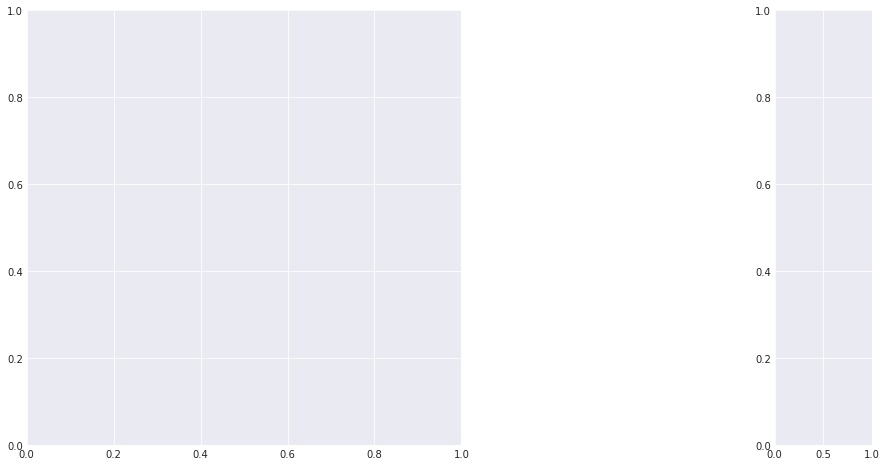

In [51]:
#!pip install --upgrade pip
#!pip install missingno

#for in case, there is no missing data.
import missingno as msno

def missingno_matrix(df, figsize=(20,8)):
    ''' Missing Value visualization by matrix plot

        Parameters:
        -----------
        df: DataFrame

        Return: matrix plot
        -----------
    '''

    missingValueColumns = df.columns[df.isnull().any()].tolist()
    msno.matrix(df[missingValueColumns],width_ratios=(10,1),\
            figsize=figsize,color=(0, 0, 0),fontsize=12, sparkline=True, labels=True)
    plt.show()
    
missingno_matrix(all_data)

#### drop out missing>15%

In [32]:
# drop out missing>15%
#all_data.head()
try:
    
    #all_data.drop(['Date'], axis=1, inplace=True)
#     all_data.drop(['PM1'], axis=1, inplace=True)
    #all_data.drop(['lon'], axis=1, inplace=True)
    #all_data.drop(['lat'], axis=1, inplace=True)
    all_data.drop(['Time'], axis=1, inplace=True)
#     all_data.drop(['LotFrontage'], axis=1, inplace=True)
#     all_data.drop(['item_target_enc'], axis=1, inplace=True)
except:
    print('no_columns_can_be_remove')
 
 #all_data = all_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])
#all_data = all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])

In [33]:
all_data.head()

,Date,Humidity,PM1,PM10,Temperature,lat,lon
0,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
1,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
2,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
3,2017-01-01,82.000,0.000,0.000,24.120,23.741,120.755
4,2017-01-01,82.000,0.000,0.000,24.120,23.741,120.755


In [34]:
all_data.describe()

,Humidity,PM1,PM10,Temperature,lat,lon
count,1157777.000,1157777.000,1157777.000,1157777.000,1157777.000,1157777.000
mean,74.676,26.125,45.716,23.063,24.180,120.669
std,13.115,12.441,23.211,3.379,0.107,0.095
min,21.000,0.000,0.000,4.120,23.080,120.219
25%,65.000,19.000,29.000,20.750,24.134,120.627
50%,74.000,26.000,46.000,23.120,24.169,120.664
75%,83.000,33.000,61.000,25.370,24.229,120.706
max,100.000,666.000,1084.000,50.000,25.062,121.582


In [35]:
#!pip install --user pandas --upgrade


# 缺失值修補

In [36]:
#all_data = all_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])


#all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#all_data["Alley"] = all_data["Alley"].fillna("None")
#all_data["Fence"] = all_data["Fence"].fillna("None")
#all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    #lambda x: x.fillna(x.median()))
# for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
#     all_data[col] = all_data[col].fillna('None')
# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#     all_data[col] = all_data[col].fillna(0)
# for col in ( 'GarageArea', 'GarageCars'):
#     all_data[col] = all_data[col].fillna(0)
# for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
#     all_data[col] = all_data[col].fillna(0)
# for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#     all_data[col] = all_data[col].fillna('None')
# all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
# all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#all_data['item_target_enc'] = all_data['item_target_enc'].fillna(all_data['item_target_enc'].mode()[0])
# all_data = all_data.drop(['Utilities'], axis=1)
# all_data["Functional"] = all_data["Functional"].fillna("Typ")
# all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
# all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
# all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
# all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
# all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
# all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [37]:
#all_data['Total_cor'] = all_data['lat'] + all_data['lon']
#all_data['lat'] = all_data.groupby('lon')['lat'].transform(lambda x: x.median())

In [38]:
all_data.head()

,Date,Humidity,PM1,PM10,Temperature,lat,lon
0,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
1,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
2,2017-01-01,83.000,0.000,0.000,24.120,23.741,120.755
3,2017-01-01,82.000,0.000,0.000,24.120,23.741,120.755
4,2017-01-01,82.000,0.000,0.000,24.120,23.741,120.755


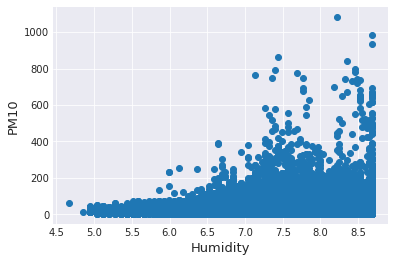

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = boxcox1p(all_data['Humidity'],0.25), y = all_data['PM10'])
plt.ylabel('PM10', fontsize=13)
plt.xlabel('Humidity', fontsize=13)
plt.show()

In [40]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(30)

,Missing Ratio


### Transforming some numerical variables that are really categorical(轉換一些真正絕對的數值變量)

In [41]:
# #MSSubClass=The building class
# all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# #Changing OverallCond into a categorical variable
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# #Year and month sold are transformed into categorical features.
# all_data['YrSold'] = all_data['YrSold'].astype(str)
# all_data['MoSold'] = all_data['MoSold'].astype(str)

In [42]:
# from sklearn.preprocessing import LabelEncoder
# cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')
# #all_data = all_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])
# # process columns, apply LabelEncoder to categorical features
# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(all_data[c].values)) 
#     all_data[c] = lbl.transform(list(all_data[c].values))

# # shape        
# print('Shape all_data: {}'.format(all_data.shape))

In [43]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PM1,2.987
lon,2.367
PM10,1.894
lat,0.557
Temperature,0.143
Humidity,0.135


### We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x
###Note that setting λ=0 is equivalent to log1p used above for the target variable.
###See this page for more details on Box Cox Transformation as well as the scipy function's page

In [44]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 6 skewed numerical features to Box Cox transform


#### Getting dummy categorical features

In [45]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1157777, 37)


### Getting the new train and test sets.

In [46]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [48]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2500,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

model_xgb = xgb.XGBRegressor(n_estimators=15000)

In [49]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb = lgb.LGBMRegressor(n_estimators=500)

In [50]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# XGBoost model 

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [67]:
ensemble = xgb_pred

In [68]:
sub = pd.DataFrame()
sub['device_id'] = test_ID
sub['pred_pm25'] = ensemble
sub.to_csv('submission_xgb.csv',index=False)

path = '/home/jovyan/Kaggle/mid_test/PM25/'
result = pd.read_csv(path + 'submission_xgb.csv', engine='c')
result = result.groupby('device_id').mean()
pd.DataFrame(result)

result.to_csv('/home/jovyan/Kaggle/mid_test/PM25/submission_PM25_xgb.csv')

# LGBoost model

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

In [109]:
ensemble_lgb = lgb_pred

In [110]:
sub = pd.DataFrame()
sub['device_id'] = test_ID
sub['pred_pm25'] = ensemble_lgb
sub.to_csv('submission_lgb.csv',index=False)

path = '/home/jovyan/Kaggle/mid_test/PM25/'
result = pd.read_csv(path + 'submission_lgb.csv', engine='c')
result = result.groupby('device_id').mean()
pd.DataFrame(result)

result.to_csv('/home/jovyan/Kaggle/mid_test/PM25/submission_PM25_lgb.csv')

In [104]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



In [105]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [106]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1257 (0.0124)



In [107]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1257 (0.0124)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
GBoost.fit(train, y_train)
GB_train_pred =GBoost.predict(train)
GB_pred = np.expm1(GBoost.predict(test))
print(rmsle(y_train, GB_train_pred))

In [ ]:
lasso.fit(train, y_train)
lasso_train_pred=lasso.predict(train)
lasso_pred = np.expm1(lasso.predict(test))

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,xgb_train_pred))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,lasso_train_pred))

In [1]:
ensemble = xgb_pred
ensemble1 = GB_pred
ensemble2 = lasso_pred
# print(len(ensemble1))

NameError: name 'xgb_pred' is not defined

In [46]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['PM2.5'] = ensemble
# sub.to_csv('submission.csv',index=False)

In [109]:
sub = pd.DataFrame()
sub['device_id'] = test_ID
sub['pred_pm25'] = ensemble1
sub.to_csv('submission_3.csv',index=False)

In [110]:
path = '/home/jovyan/Kaggle/mid_test/PM25/'
result = pd.read_csv(path + 'submission_3.csv', engine='c')
result = result.groupby('device_id').mean()
pd.DataFrame(result)

result.to_csv('/home/jovyan/Kaggle/mid_test/PM25/submission_PM25.csv')

In [ ]:
sub = pd.DataFrame()
sub['device_id'] = test_ID
sub['pred_pm25'] = ensemble
sub.to_csv('submission_4.csv',index=False)

In [ ]:
path = '/home/jovyan/Kaggle/mid_test/PM25/'
result = pd.read_csv(path + 'submission_4.csv', engine='c')
result = result.groupby('device_id').mean()
pd.DataFrame(result)

result.to_csv('/home/jovyan/Kaggle/mid_test/PM25/submission_PM25_1.csv')

In [100]:
sub = pd.DataFrame()
sub['device_id'] = test_ID
sub['pred_pm25'] = ensemble2
sub.to_csv('submission_5.csv',index=False)

In [101]:
path = '/home/jovyan/Kaggle/mid_test/PM25/'
result = pd.read_csv(path + 'submission_5.csv', engine='c')
result = result.groupby('device_id').mean()
pd.DataFrame(result)

result.to_csv('/home/jovyan/Kaggle/mid_test/PM25/submission_PM25_2.csv')